In [3]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import numpy as np
import warnings
from time import sleep, time
from random import randint
import matplotlib.pyplot as plt

In [4]:
# Lists to store the scraped data in
movie_name = []
years = []
imdb_ratings = []
metascores = []
votes = []
count_requests = 0


for year in np.arange(2010,2021,1):
    for page in np.arange(1,251,50):
        
        
        #url = "https://www.imdb.com/search/title/?release_date="+ str(year) + "&sort=num_votes,desc&start="+ str(page) +"&ref_=adv_nxt"
        url = 'https://www.imdb.com/search/title/?release_date={year}&title_type=feature&sort=num_votes,desc&start={record}&ref_=adv_nxt'.format(year=year, record=page)
        print(url)
        response = requests.get(url)
        
        sleep(3)

        
        if response.status_code != 200:
            warnings.warn('There is an Error in your status  ' + res_page.status_code)
            
        count_requests += 1
        
        if count_requests > 70 :
            break

        
        soup = BeautifulSoup(response.text, 'html.parser')



        # find movie containers
        movie_data = soup.find_all('div', class_= 'lister-item mode-advanced')
        movie_data


        for store in movie_data:
            name = store.h3.a.text
            movie_name.append(name)

            release_date = store.h3.find('span', class_ = 'lister-item-year').text
            years.append(release_date)

            imdb = float(store.strong.text)#store.float('div', class_ = 'inline-block rating-imdb-ratinge3').text
            imdb_ratings.append(imdb)

            m_score = store.find('span', class_ = 'metascore').text if store.find('span', class_='metascore') else ''
            metascores.append(m_score) 

            nv = store.find_all('span', attrs = {'name':'nv'})[0].text
            votes.append(nv)
            
            
movies_list = pd.DataFrame({
            'movie': movie_name,
            'year': years,
            'imdb': imdb_ratings,
            'metascore': metascores,
            'votes': votes
            
    })
    

#print dataframe on screen
print(movies_list)

# write scraped data to a CSV file
movies_list.to_csv('movies_list.csv')

https://www.imdb.com/search/title/?release_date=2010&title_type=feature&sort=num_votes,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?release_date=2010&title_type=feature&sort=num_votes,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?release_date=2010&title_type=feature&sort=num_votes,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?release_date=2010&title_type=feature&sort=num_votes,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?release_date=2010&title_type=feature&sort=num_votes,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?release_date=2011&title_type=feature&sort=num_votes,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?release_date=2011&title_type=feature&sort=num_votes,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?release_date=2011&title_type=feature&sort=num_votes,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?release_date=2011&title_type=feature&sort=num_votes

In [12]:
movie_df = pd.read_csv("movies_list.csv")
movie_df

,Unnamed: 0,movie,year,imdb,metascore,votes
0,0,Inception,(2010),8.8,74.0,"2,258,044"
1,1,Shutter Island,(2010),8.2,63.0,"1,250,916"
2,2,Toy Story 3,(2010),8.3,92.0,"810,234"
3,3,Iron Man 2,(2010),7.0,57.0,"788,680"
4,4,Black Swan,(2010),8.0,79.0,"743,470"
...,...,...,...,...,...,...
2745,2745,Shams Al-Ma'arif,(2020),8.1,NaN,"8,696"
2746,2746,Tesla,(I) (2020),5.1,67.0,"8,680"
2747,2747,I'm Your Woman,(2020),6.2,63.0,"8,666"
2748,2748,Mortal,(I) (2020),6.0,20.0,"8,662"


In [13]:
# Drop all NaN values:
movie_df = movie_df.dropna()
movie_df.loc[:, 'year'] = movie_df['year'].str[-5:-1].astype(int)
print(movie_df.isnull().sum())
movie_df

Unnamed: 0    0
movie         0
year          0
imdb          0
metascore     0
votes         0
dtype: int64


C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Unnamed: 0,movie,year,imdb,metascore,votes
0,0,Inception,2010,8.8,74.0,"2,258,044"
1,1,Shutter Island,2010,8.2,63.0,"1,250,916"
2,2,Toy Story 3,2010,8.3,92.0,"810,234"
3,3,Iron Man 2,2010,7.0,57.0,"788,680"
4,4,Black Swan,2010,8.0,79.0,"743,470"
...,...,...,...,...,...,...
2742,2742,2067,2020,4.9,39.0,"9,002"
2744,2744,Black Is King,2020,5.8,84.0,"8,754"
2746,2746,Tesla,2020,5.1,67.0,"8,680"
2747,2747,I'm Your Woman,2020,6.2,63.0,"8,666"


In [17]:
#Matplotlib df
movie_df.to_csv('movies_new.csv',index=False) 

In [18]:
df = pd.read_csv('movies_new.csv')
df

,Unnamed: 0,movie,year,imdb,metascore,votes
0,0,Inception,2010,8.8,74.0,"2,258,044"
1,1,Shutter Island,2010,8.2,63.0,"1,250,916"
2,2,Toy Story 3,2010,8.3,92.0,"810,234"
3,3,Iron Man 2,2010,7.0,57.0,"788,680"
4,4,Black Swan,2010,8.0,79.0,"743,470"
...,...,...,...,...,...,...
2375,2742,2067,2020,4.9,39.0,"9,002"
2376,2744,Black Is King,2020,5.8,84.0,"8,754"
2377,2746,Tesla,2020,5.1,67.0,"8,680"
2378,2747,I'm Your Woman,2020,6.2,63.0,"8,666"


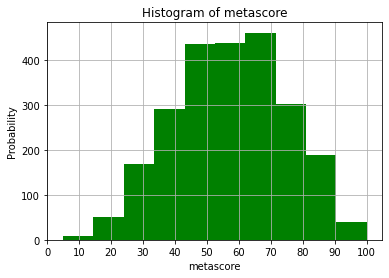

In [23]:
# Data Visualization(Metascore)
plot = plt.hist(df["metascore"], facecolor='green')


plt.xlabel('metascore')
plt.ylabel('Probability')
plt.title('Histogram of metascore')
plt.xticks(np.arange(0, 101, step=10))
plt.grid(True)
plt.show()

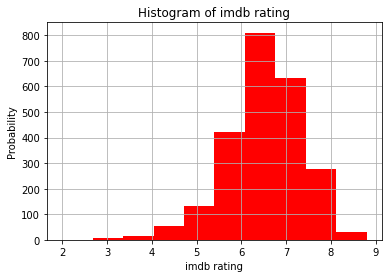

In [24]:
# Data Visualization(Imdb_rating)
plot1 = plt.hist(df["imdb"], facecolor='red')


plt.xlabel('imdb rating')
plt.ylabel('Probability')
plt.title('Histogram of imdb rating')
plt.grid(True)
plt.show()